# Importing required Library 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline
import warnings
import re
import numpy as np
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

[nltk_data] <urlopen error [Errno 11001] getaddrinfo failed>


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn import metrics

# Actual Data Loading

In [3]:
Tourist = pd.read_csv("tourist_accommodation_reviews.csv")
Tourist.shape

(53644, 5)

In [4]:
Tourist.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
#Unique Restaurants
Tourist['Hotel/Restaurant name'].nunique()

537

In [6]:
#Unique Location
Tourist['Location'].nunique()

25

In [7]:
#Unique Location
Tourist['Review'].nunique()

49938

# Check for Null values

In [8]:
Tourist.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [9]:
#Joining Original Data with the Pre_Processed Reviews
cleaned_reviews = pd.read_csv("Raw_CleanedReviews.csv")
cleaned_reviews.head()

,Review,Processed_review
0,Just been for sunday roast lamb and beef truly...,sunday roast lamb beef truly excellentout coud...
1,"Quietly set off the main road, nice atmosphere...",quietly set main road nice atmosphere immacula...
2,I made a reservation for a birthday two days i...,make reservation birthday two day advance assu...
3,We visit here regularly and never fail to be i...,visit regularly never fail impress quality pre...
4,Visited this wonderful place on my travels and...,visit wonderful place travel complain anything...


In [10]:
cleaned_reviews.shape, Tourist.shape

((53644, 2), (53644, 5))

In [11]:
combined_data = pd.concat([Tourist,cleaned_reviews],axis=1)
combined_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Review,Processed_review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,Just been for sunday roast lamb and beef truly...,sunday roast lamb beef truly excellentout coud...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...","Quietly set off the main road, nice atmosphere...",quietly set main road nice atmosphere immacula...
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,I made a reservation for a birthday two days i...,make reservation birthday two day advance assu...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,We visit here regularly and never fail to be i...,visit regularly never fail impress quality pre...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,Visited this wonderful place on my travels and...,visit wonderful place travel complain anything...


In [12]:
combined_data['Location_Hotel'] = combined_data['Location']+'_'+combined_data['Hotel/Restaurant name']

In [13]:
combined_data.columns

Index(['ID', 'Review Date', 'Location', 'Hotel/Restaurant name', 'Review',
       'Review', 'Processed_review', 'Location_Hotel'],
      dtype='object')

In [14]:
processed_data = combined_data[['ID', 'Review Date', 'Location', 'Hotel/Restaurant name','Processed_review','Location_Hotel']]

In [15]:
processed_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,sunday roast lamb beef truly excellentout coud...,Kathu_Thong Dee The Kathu Brasserie
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,quietly set main road nice atmosphere immacula...,Kathu_Thong Dee The Kathu Brasserie
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,make reservation birthday two day advance assu...,Kathu_Thong Dee The Kathu Brasserie
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,visit regularly never fail impress quality pre...,Kathu_Thong Dee The Kathu Brasserie
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,visit wonderful place travel complain anything...,Kathu_Thong Dee The Kathu Brasserie


# Check on Total Reviews per Restaurant

In [16]:
HotelReviewCount = pd.DataFrame(processed_data.groupby(['Hotel/Restaurant name']).\
                         agg(Total_Reviews=('Processed_review','count'))).reset_index().\
                    sort_values(by="Total_Reviews",ascending=False)
HotelReviewCount

,Hotel/Restaurant name,Total_Reviews
110,Da Mario,279
298,No.6 Restaurant,200
383,Sabai Sabai,200
483,The Pizza Company,198
470,The Family Restaurant,196
...,...,...
433,Sultan's Grill Authentic Turkish & Indian Cuisine,91
0,+39 Italian Street Food,91
93,Chez Nicolas,90
115,Dada Yura Restaurant,80


#  Check on Top Location with Most Reviews

In [17]:
## Check on Top Location/Hotel with Most Reviews
LocationHotelReviewCount = pd.DataFrame(processed_data.groupby(['Location','Hotel/Restaurant name']).\
                         agg(Total_Reviews=('Processed_review','count'))).reset_index().\
                    sort_values(by="Total_Reviews",ascending=False)
LocationHotelReviewCount.head(10)

,Location,Hotel/Restaurant name,Total_Reviews
376,Patong,No.6 Restaurant,200
310,Patong,Da Mario,187
0,Bang Tao Beach,Catch Beach Club,100
328,Patong,Hard Rock Cafe Phuket,100
341,Patong,Kantok Restaurant at Burasari Resort,100
340,Patong,K-Hotel Restaurant and Beer Garden,100
339,Patong,Joe's Downstairs,100
337,Patong,James & Joyce Irish Pub,100
336,Patong,Irish Times Pub,100
335,Patong,Indian Delight Restaurant,100


In [18]:
## Check on Top Location with Most Reviews
LocationReviewCount = pd.DataFrame(processed_data.groupby(['Location']).\
                         agg(Total_Reviews=('Processed_review','count'))).reset_index().\
                    sort_values(by="Total_Reviews",ascending=False)
LocationReviewCount.head(10)

,Location,Total_Reviews
16,Patong,16403
5,Karon,5826
7,Kata Beach,5752
19,Rawai,3811
3,Choeng Thale,3378
17,Phuket Town,3356
4,Kamala,3162
11,Mai Khao,2372
1,Cape Panwa,1500
2,Chalong,1287


In [19]:
Top_10Location = list(LocationReviewCount['Location'].values)[:10]
Top_10Location

[' Patong',
 ' Karon',
 ' Kata Beach',
 ' Rawai',
 ' Choeng Thale',
 ' Phuket Town',
 ' Kamala',
 ' Mai Khao',
 ' Cape Panwa',
 ' Chalong']

# Selecting Top 3 hotels for top 10 Locations

In [20]:
# Selecting top 3 hotels with highest reviews for top location
LocationHotelReviewCount[LocationHotelReviewCount['Location']==" Patong"].iloc[:3,:]

,Location,Hotel/Restaurant name,Total_Reviews
376,Patong,No.6 Restaurant,200
310,Patong,Da Mario,187
328,Patong,Hard Rock Cafe Phuket,100


In [21]:
df = pd.DataFrame()
for loc in Top_10Location:
    selected_data = LocationHotelReviewCount[LocationHotelReviewCount['Location']==loc].iloc[:3,:]
    df = pd.concat([df,selected_data],axis=0)

In [22]:
df.head(30)

,Location,Hotel/Restaurant name,Total_Reviews
376,Patong,No.6 Restaurant,200
310,Patong,Da Mario,187
328,Patong,Hard Rock Cafe Phuket,100
144,Karon,Sansabai restaurant,100
142,Karon,Red Chopsticks,100
138,Karon,Pad Thai Shop,100
194,Kata Beach,No. 24 Bar & Restaurant,100
198,Kata Beach,Peony Cafe & Restaurant,100
201,Kata Beach,Red Chair Restaurant,100
491,Rawai,Flip Side,100


In [23]:
df['Location_Hotel'] = df['Location']+'_'+df['Hotel/Restaurant name']
df.head()

,Location,Hotel/Restaurant name,Total_Reviews,Location_Hotel
376,Patong,No.6 Restaurant,200,Patong_No.6 Restaurant
310,Patong,Da Mario,187,Patong_Da Mario
328,Patong,Hard Rock Cafe Phuket,100,Patong_Hard Rock Cafe Phuket
144,Karon,Sansabai restaurant,100,Karon_Sansabai restaurant
142,Karon,Red Chopsticks,100,Karon_Red Chopsticks


In [24]:
top_30_HotelLoationList = list(df['Location_Hotel'].unique())
top_30_HotelLoationList, len(top_30_HotelLoationList)

([' Patong_No.6 Restaurant',
  ' Patong_Da Mario',
  ' Patong_Hard Rock Cafe Phuket',
  ' Karon_Sansabai restaurant',
  ' Karon_Red Chopsticks',
  ' Karon_Pad Thai Shop',
  ' Kata Beach_No. 24 Bar & Restaurant',
  ' Kata Beach_Peony Cafe & Restaurant',
  ' Kata Beach_Red Chair Restaurant',
  ' Rawai_Flip Side',
  ' Rawai_D Wine Italian Bistro & Wine Bar',
  ' Rawai_Cashew Nuts Food',
  ' Choeng Thale_DeDos',
  ' Choeng Thale_Golden Paradise Restaurant',
  ' Choeng Thale_Bampot Kitchen & Bar',
  ' Phuket Town_Tiger Inn Restaurant',
  ' Phuket Town_The Kitchen',
  ' Phuket Town_Surf and Turf by Soul Kitchen',
  ' Kamala_Grill Bill',
  ' Kamala_Cafe del Mar Phuket',
  ' Kamala_Napoli Ristorante Pizzeria',
  ' Mai Khao_Mai Khao Seafood Local Restaurant',
  ' Mai Khao_Tropica Restaurant & Beer Garden',
  ' Mai Khao_The Coffee Club - The Turtle Village',
  ' Cape Panwa_Tree Top Restaurant and Bar',
  " Cape Panwa_Uncle Nan's Italian Restaurant",
  ' Cape Panwa_Bamboo Bar',
  ' Chalong_Happy 

# Fetching complete data for selected 30 Hotels

In [25]:
HotelReviewCount = processed_data[processed_data['Location_Hotel'].isin(top_30_HotelLoationList)]
HotelReviewCount

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,wow find true tripadvisor happy chance dine st...,Phuket Town_Surf and Turf by Soul Kitchen
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,good crossover food ever fully satisfied one t...,Phuket Town_Surf and Turf by Soul Kitchen
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,visit restaurant base review ta order beef rav...,Phuket Town_Surf and Turf by Soul Kitchen
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,husband go dinner last night pleased food serv...,Phuket Town_Surf and Turf by Soul Kitchen
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,french chef really concerned quality dish fish...,Phuket Town_Surf and Turf by Soul Kitchen
...,...,...,...,...,...,...
52953,rn233766814,"Reviewed October 11, 2014",Mai Khao,Tropica Restaurant & Beer Garden,visit restaurant year keep come back fusion eu...,Mai Khao_Tropica Restaurant & Beer Garden
52954,rn227391733,"Reviewed September 6, 2014",Mai Khao,Tropica Restaurant & Beer Garden,stay eat recommend food atmosphere dining caba...,Mai Khao_Tropica Restaurant & Beer Garden
52955,rn224727246,"Reviewed August 26, 2014",Mai Khao,Tropica Restaurant & Beer Garden,settle long day beach lovely piece beef surpri...,Mai Khao_Tropica Restaurant & Beer Garden
52956,rn223964901,"Reviewed August 23, 2014",Mai Khao,Tropica Restaurant & Beer Garden,place luxurious lighting tree beautiful thing ...,Mai Khao_Tropica Restaurant & Beer Garden


In [26]:
HotelReviewCount['Location_Hotel'].nunique()

30

In [27]:
HotelReviewCount.to_csv("HotelReviewCount.csv",index=False)

In [28]:
HotelReviewCount.head()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,wow find true tripadvisor happy chance dine st...,Phuket Town_Surf and Turf by Soul Kitchen
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,good crossover food ever fully satisfied one t...,Phuket Town_Surf and Turf by Soul Kitchen
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,visit restaurant base review ta order beef rav...,Phuket Town_Surf and Turf by Soul Kitchen
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,husband go dinner last night pleased food serv...,Phuket Town_Surf and Turf by Soul Kitchen
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,french chef really concerned quality dish fish...,Phuket Town_Surf and Turf by Soul Kitchen


In [29]:
HotelReviewCount['Hotel/Restaurant name'].nunique()

30

In [30]:
## Fetching Processed Reviews for top 30 Restaurants
reviews = pd.DataFrame(HotelReviewCount['Processed_review'])
reviews.head()

,Processed_review
593,wow find true tripadvisor happy chance dine st...
594,good crossover food ever fully satisfied one t...
595,visit restaurant base review ta order beef rav...
596,husband go dinner last night pleased food serv...
597,french chef really concerned quality dish fish...


# Pre-Processing reviews to get a cleaned and processed version to analyze 

In [31]:
!pip install contractions
!pip install spacy
import re

import contractions
import spacy
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
reviews = pd.DataFrame(processed_data['Processed_review'])
reviews

,Processed_review
0,sunday roast lamb beef truly excellentout coud...
1,quietly set main road nice atmosphere immacula...
2,make reservation birthday two day advance assu...
3,visit regularly never fail impress quality pre...
4,visit wonderful place travel complain anything...
...,...
53639,love small restaurant great food extreme frien...
53640,stop restaurant shop jung ceylon close main sq...
53641,great time one good restaurant phuket town own...
53642,bite become favorite restaurant phuket food ab...


# Defining Functions for Data Cleaning and Pre-processing

In [33]:
simple_text = 'love small restaurant great food extreme crossover food ever fully satisfied one top restaurant would recommend phuket'

In [34]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
tokenized_document = tokenizer.tokenize(simple_text)
print(tokenized_document)

['love', 'small', 'restaurant', 'great', 'food', 'extreme', 'crossover', 'food', 'ever', 'fully', 'satisfied', 'one', 'top', 'restaurant', 'would', 'recommend', 'phuket']


In [35]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
cleaned_tokens = []
for word in tokenized_document:
  word = word.lower()
  if word not in stop_words:
    cleaned_tokens.append(word)
print(cleaned_tokens)

['love', 'small', 'restaurant', 'great', 'food', 'extreme', 'crossover', 'food', 'ever', 'fully', 'satisfied', 'one', 'top', 'restaurant', 'would', 'recommend', 'phuket']


In [38]:
cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
print(cleaned_tokens)

['love', 'small', 'restaurant', 'great', 'food', 'extreme', 'crossover', 'food', 'ever', 'fully', 'satisfied', 'one', 'top', 'restaurant', 'would', 'recommend', 'phuket']


In [39]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti', 'sings', 'hopped', 'rocks', 'better', 'easily']
pos = ['n', 'v', 'v', 'n', 'a', 'r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos = pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("lemmatized words: ", lemmatized_words)
print("Stemmed words: ", stemmed_words)

lemmatized words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [40]:
stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]
print(stemmed_text)

['love', 'small', 'restaur', 'great', 'food', 'extrem', 'crossov', 'food', 'ever', 'fulli', 'satisfi', 'one', 'top', 'restaur', 'would', 'recommend', 'phuket']


In [41]:
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

# Preliminary Data Pre-Processing Steps

In [42]:
print(preprocess_text('love small restaurant hotel great!'))
print(preprocess_text('This hotel is not great!'))

['love', 'small', 'restaur', 'hotel', 'great']
['hotel', 'great']


In [43]:
reviews.head()

,Processed_review
0,sunday roast lamb beef truly excellentout coud...
1,quietly set main road nice atmosphere immacula...
2,make reservation birthday two day advance assu...
3,visit regularly never fail impress quality pre...
4,visit wonderful place travel complain anything...


In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('love small restaurant hotel great!'))
print(sentiment.polarity_scores('This hotel is not great'))

{'neg': 0.0, 'neu': 0.259, 'pos': 0.741, 'compound': 0.8622}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [45]:
HotelReviewCount = pd.concat([HotelReviewCount],axis=1)
HotelReviewCount.head()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,wow find true tripadvisor happy chance dine st...,Phuket Town_Surf and Turf by Soul Kitchen
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,good crossover food ever fully satisfied one t...,Phuket Town_Surf and Turf by Soul Kitchen
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,visit restaurant base review ta order beef rav...,Phuket Town_Surf and Turf by Soul Kitchen
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,husband go dinner last night pleased food serv...,Phuket Town_Surf and Turf by Soul Kitchen
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,french chef really concerned quality dish fish...,Phuket Town_Surf and Turf by Soul Kitchen


# Loading Pre-trained Model for Sentiment Analysis

In [46]:
HotelReviewCount = pd.concat([HotelReviewCount],axis=1)
HotelReviewCount.head()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,wow find true tripadvisor happy chance dine st...,Phuket Town_Surf and Turf by Soul Kitchen
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,good crossover food ever fully satisfied one t...,Phuket Town_Surf and Turf by Soul Kitchen
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,visit restaurant base review ta order beef rav...,Phuket Town_Surf and Turf by Soul Kitchen
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,husband go dinner last night pleased food serv...,Phuket Town_Surf and Turf by Soul Kitchen
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,french chef really concerned quality dish fish...,Phuket Town_Surf and Turf by Soul Kitchen


In [47]:
HotelReviewCount.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel
count,3187,3187,3187,3187,3187,3187
unique,3087,1093,10,30,3087,30
top,rn516885947,Reviewed 1 week ago,Patong,No.6 Restaurant,phuket first time janjan accident bump restaur...,Patong_No.6 Restaurant
freq,6,81,487,200,6,200


In [48]:
def expand_contractions(text):
    return contractions.fix(text)


def spacy_lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [49]:
def text_pre_processor(text, contraction_expansion=True,
                       text_lower_case=True, text_lemmatization=True, 
                       special_char_removal=True, remove_digits=True, stopword_removal=True, 
                       stopword_list=None):
    # lowercase the text    
    if text_lower_case:
        text = text.lower()

    # expand contractions    
    if contraction_expansion:
        text = expand_contractions(text)
        
    # lemmatize text
    if text_lemmatization:
        text = spacy_lemmatize_text(text)
        
    # remove special characters and\or digits    
    if special_char_removal:
        text = remove_special_characters(text, remove_digits=remove_digits)

    # remove stopwords
    if stopword_removal:
        text = remove_stopwords(text)
        
    # remove extra whitespace
    text = re.sub(' +', ' ', text)
    text = text.strip()
    
    return text

# Extracting the values from dic and creating new columns within dataframe

In [50]:
#extracting the values from dic and creating new columns within dataframe

HotelReviewCount['compound'] = [sentiment.polarity_scores(review)['compound'] for review in HotelReviewCount['Processed_review']]
HotelReviewCount['neg'] = [sentiment.polarity_scores(review)['neg'] for review in HotelReviewCount['Processed_review']]
HotelReviewCount['neu'] = [sentiment.polarity_scores(review)['neu'] for review in HotelReviewCount['Processed_review']]
HotelReviewCount['pos'] = [sentiment.polarity_scores(review)['pos'] for review in HotelReviewCount['Processed_review']]

In [51]:
HotelReviewCount.head()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel,compound,neg,neu,pos
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,wow find true tripadvisor happy chance dine st...,Phuket Town_Surf and Turf by Soul Kitchen,0.9694,0.000,0.368,0.632
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,good crossover food ever fully satisfied one t...,Phuket Town_Surf and Turf by Soul Kitchen,0.8610,0.000,0.431,0.569
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,visit restaurant base review ta order beef rav...,Phuket Town_Surf and Turf by Soul Kitchen,0.8910,0.000,0.685,0.315
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,husband go dinner last night pleased food serv...,Phuket Town_Surf and Turf by Soul Kitchen,0.8756,0.000,0.560,0.440
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,french chef really concerned quality dish fish...,Phuket Town_Surf and Turf by Soul Kitchen,0.3400,0.158,0.592,0.250


In [52]:
#Getting insight into the sentiment score 
HotelReviewCount[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3187.000000,3187.000000,3187.000000,3187.000000
mean,0.679731,0.039564,0.602276,0.358152
std,0.372042,0.073271,0.157194,0.169734
min,-0.960700,0.000000,0.188000,0.000000
25%,0.599400,0.000000,0.486000,0.235500
50%,0.831600,0.000000,0.590000,0.366000
75%,0.918400,0.069000,0.708500,0.485000
max,0.989900,0.541000,1.000000,0.812000


# Comparing 30 hotel reveiws (fraction with the whhole)

<AxesSubplot:xlabel='compound', ylabel='Count'>

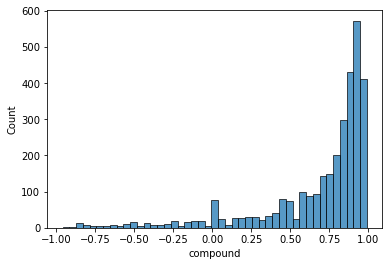

In [53]:
sns.histplot(HotelReviewCount['compound']) #30 hotels

<AxesSubplot:xlabel='neg', ylabel='Count'>

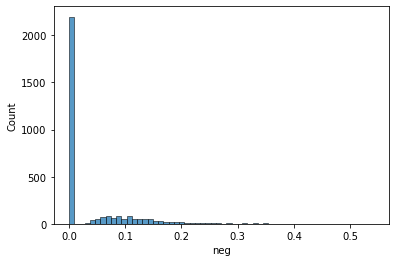

In [54]:
sns.histplot(HotelReviewCount['neg']) #30 hotels

<AxesSubplot:xlabel='neu', ylabel='Count'>

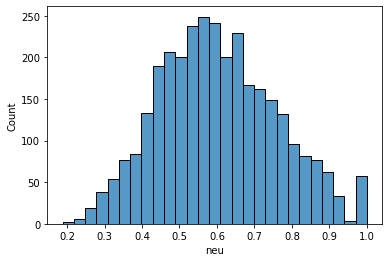

In [55]:
sns.histplot(HotelReviewCount['neu']) #30 hotels

<AxesSubplot:xlabel='pos', ylabel='Count'>

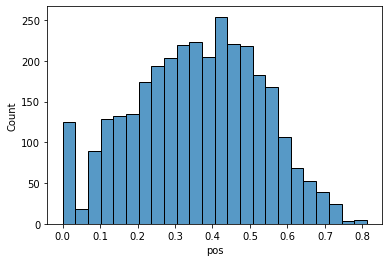

In [56]:
sns.histplot(HotelReviewCount['pos']) #30 hotels

In [57]:
#Lets look at how many negative reviews we have per location
(HotelReviewCount['compound']<=0).groupby(HotelReviewCount['Location']).sum()

Location
 Cape Panwa      29
 Chalong         23
 Choeng Thale     7
 Kamala          31
 Karon           29
 Kata Beach      16
 Mai Khao        34
 Patong          41
 Phuket Town     41
 Rawai           25
Name: compound, dtype: int64

In [58]:
#Lets look at how many positive reviews we have per location
(HotelReviewCount['compound']>0).groupby(HotelReviewCount['Location']).sum()

Location
 Cape Panwa      271
 Chalong         277
 Choeng Thale    293
 Kamala          269
 Karon           271
 Kata Beach      284
 Mai Khao        266
 Patong          446
 Phuket Town     259
 Rawai           275
Name: compound, dtype: int64

In [59]:
#Lets look at how many negative reviews we have per hotel
(HotelReviewCount['compound']<=0).groupby(HotelReviewCount['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Bamboo Bar                               7
Bampot Kitchen & Bar                     2
Cafe del Mar Phuket                     13
Cashew Nuts Food                         6
D Wine Italian Bistro & Wine Bar        11
Da Mario                                25
DeDos                                    3
Flip Side                                8
Golden Paradise Restaurant               2
Grill Bill                               5
Happy Days                               5
Hard Rock Cafe Phuket                    5
Kan Eang 2                              12
Kan Eang@Pier Restaurant                 6
Mai Khao Seafood Local Restaurant        8
Napoli Ristorante Pizzeria              13
No. 24 Bar & Restaurant                  6
No.6 Restaurant                         11
Pad Thai Shop                            6
Peony Cafe & Restaurant                  6
Red Chair Restaurant                     4
Red Chopsticks                           9
Sansabai restaurant             

In [60]:
#Lets look at how many positive reviews we have per hotel
(HotelReviewCount['compound']>0).groupby(HotelReviewCount['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Bamboo Bar                               93
Bampot Kitchen & Bar                     98
Cafe del Mar Phuket                      87
Cashew Nuts Food                         94
D Wine Italian Bistro & Wine Bar         89
Da Mario                                162
DeDos                                    97
Flip Side                                92
Golden Paradise Restaurant               98
Grill Bill                               95
Happy Days                               95
Hard Rock Cafe Phuket                    95
Kan Eang 2                               88
Kan Eang@Pier Restaurant                 94
Mai Khao Seafood Local Restaurant        92
Napoli Ristorante Pizzeria               87
No. 24 Bar & Restaurant                  94
No.6 Restaurant                         189
Pad Thai Shop                            94
Peony Cafe & Restaurant                  94
Red Chair Restaurant                     96
Red Chopsticks                           91
Sansabai r

In [61]:
#Calculate as percentage of total reviews by location

percentage_negative_location = pd.DataFrame((HotelReviewCount['compound']<=0).groupby(HotelReviewCount['Location']).sum()
                      / HotelReviewCount['Location'].groupby(HotelReviewCount['Location']).count()*100,
                      columns=['% negative reviews']).sort_values(by='% negative reviews')
percentage_negative_location

,% negative reviews
Location,
Choeng Thale,2.333333
Kata Beach,5.333333
Chalong,7.666667
Rawai,8.333333
Patong,8.418891
Cape Panwa,9.666667
Karon,9.666667
Kamala,10.333333
Mai Khao,11.333333


In [62]:
#Calculate as percentage of total reviews by hotel

percentage_negative_hotel = pd.DataFrame((HotelReviewCount['compound']<=0).groupby(HotelReviewCount['Hotel/Restaurant name']).sum()
                      / HotelReviewCount['Hotel/Restaurant name'].groupby(HotelReviewCount['Hotel/Restaurant name']).count()*100,
                      columns=['% negative reviews']).sort_values(by='% negative reviews')
percentage_negative_hotel

,% negative reviews
Hotel/Restaurant name,
Golden Paradise Restaurant,2.000000
Bampot Kitchen & Bar,2.000000
Surf and Turf by Soul Kitchen,2.000000
DeDos,3.000000
Tree Top Restaurant and Bar,4.000000
Red Chair Restaurant,4.000000
Grill Bill,5.000000
Happy Days,5.000000
Hard Rock Cafe Phuket,5.000000


In [63]:
#Calculate as percentage of total reviews by hotel

percentage_positive_hotel = pd.DataFrame((HotelReviewCount['compound']>0).groupby(HotelReviewCount['Hotel/Restaurant name']).sum()
                      / HotelReviewCount['Hotel/Restaurant name'].groupby(HotelReviewCount['Hotel/Restaurant name']).count()*100,
                      columns=['% positive reviews']).sort_values(by='% positive reviews')
percentage_positive_hotel

,% positive reviews
Hotel/Restaurant name,
Tiger Inn Restaurant,79.000000
Tropica Restaurant & Beer Garden,81.000000
Uncle Nan's Italian Restaurant,82.000000
The Kitchen,82.000000
Sansabai restaurant,86.000000
Da Mario,86.631016
Cafe del Mar Phuket,87.000000
Napoli Ristorante Pizzeria,87.000000
Kan Eang 2,88.000000


In [64]:
#Calculate as percentage of total reviews by location

percentage_positive_location = pd.DataFrame((HotelReviewCount['compound']>0).groupby(HotelReviewCount['Location']).sum()
                      / HotelReviewCount['Location'].groupby(HotelReviewCount['Location']).count()*100,
                      columns=['% positive reviews']).sort_values(by='% positive reviews')
percentage_positive_location

,% positive reviews
Location,
Phuket Town,86.333333
Mai Khao,88.666667
Kamala,89.666667
Cape Panwa,90.333333
Karon,90.333333
Patong,91.581109
Rawai,91.666667
Chalong,92.333333
Kata Beach,94.666667


<AxesSubplot:xlabel='% negative reviews', ylabel='Location'>

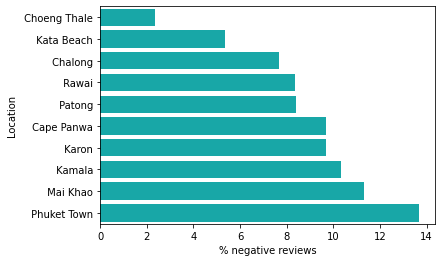

In [65]:
#ploting horitzontal barplot using seaborn
sns.barplot(data=percentage_negative_location, x='% negative reviews',y=percentage_negative_location.index,color='c')

<AxesSubplot:xlabel='% positive reviews', ylabel='Location'>

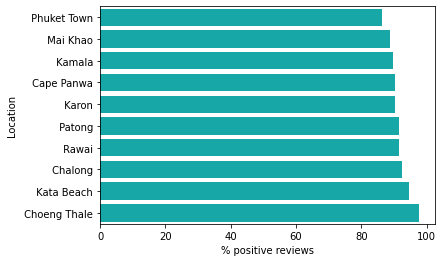

In [66]:
#ploting horitzontal barplot using seaborn
sns.barplot(data=percentage_positive_location, x='% positive reviews',y=percentage_positive_location.index,color='c')

<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

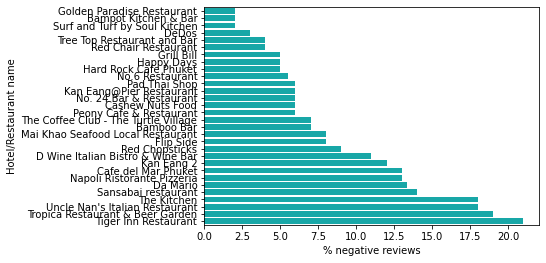

In [67]:
#ploting horitzontal barplot using seaborn
sns.barplot(data=percentage_negative_hotel, x='% negative reviews',y=percentage_negative_hotel.index,color='c')

<AxesSubplot:xlabel='% positive reviews', ylabel='Hotel/Restaurant name'>

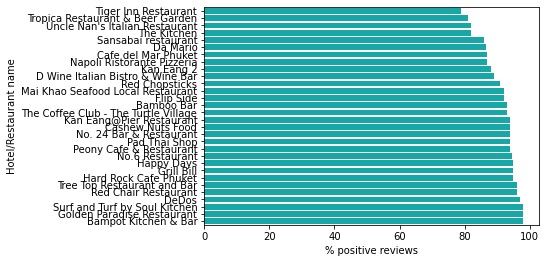

In [68]:
#ploting horitzontal barplot using seaborn
sns.barplot(data=percentage_positive_hotel, x='% positive reviews',y=percentage_positive_hotel.index,color='c')

In [69]:
HotelReviewCount.Location.unique()

array([' Phuket Town', ' Karon', ' Choeng Thale', ' Rawai', ' Kamala',
       ' Kata Beach', ' Cape Panwa', ' Patong', ' Chalong', ' Mai Khao'],
      dtype=object)

In [70]:
Hotel_list= list(HotelReviewCount['Hotel/Restaurant name'].unique())

In [71]:
Hotel_list

['Surf and Turf by Soul Kitchen',
 'Pad Thai Shop',
 'Golden Paradise Restaurant',
 'Bampot Kitchen & Bar',
 'Cashew Nuts Food',
 'Grill Bill',
 'Red Chair Restaurant',
 'DeDos',
 'Tree Top Restaurant and Bar',
 'Hard Rock Cafe Phuket',
 'Peony Cafe & Restaurant',
 'Napoli Ristorante Pizzeria',
 'No.6 Restaurant',
 'Bamboo Bar',
 'Happy Days',
 'Da Mario',
 'The Coffee Club - The Turtle Village',
 'Kan Eang@Pier Restaurant',
 'Red Chopsticks',
 'Sansabai restaurant',
 'Kan Eang 2',
 'Mai Khao Seafood Local Restaurant',
 'Flip Side',
 'Cafe del Mar Phuket',
 'D Wine Italian Bistro & Wine Bar',
 'No. 24 Bar & Restaurant',
 'The Kitchen',
 "Uncle Nan's Italian Restaurant",
 'Tiger Inn Restaurant',
 'Tropica Restaurant & Beer Garden']

In [72]:
HotelReviewCount['new_review'] = HotelReviewCount['Processed_review'].apply(preprocess_text)
reviews_positive_subset = HotelReviewCount.loc[(HotelReviewCount['Hotel/Restaurant name'] == 'Golden Paradise Restaurant')
  & (HotelReviewCount['compound']>=0), :]

reviews_negative_subset = HotelReviewCount.loc[(HotelReviewCount['Hotel/Restaurant name'] == 'Golden Paradise Restaurant')
  & (HotelReviewCount['compound']<=0), :]

reviews_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel,compound,neg,neu,pos,new_review
1690,rn581235126,Reviewed yesterday,Choeng Thale,Golden Paradise Restaurant,nice place go dinner karon good selection thai...,Choeng Thale_Golden Paradise Restaurant,0.8834,0.000,0.515,0.485,"[nice, place, go, dinner, karon, good, select,..."
1691,rn581225001,Reviewed yesterday,Choeng Thale,Golden Paradise Restaurant,golden paradise great restaurant get butter ch...,Choeng Thale_Golden Paradise Restaurant,0.9623,0.066,0.302,0.631,"[golden, paradis, great, restaur, get, butter,..."
1692,rn581064486,Reviewed 2 days ago,Choeng Thale,Golden Paradise Restaurant,good restaurant friendly staff recommend come ...,Choeng Thale_Golden Paradise Restaurant,0.8720,0.000,0.268,0.732,"[good, restaur, friendli, staff, recommend, co..."
1693,rn581018400,Reviewed 2 days ago,Choeng Thale,Golden Paradise Restaurant,good food friendly staff indian food delicious...,Choeng Thale_Golden Paradise Restaurant,0.9286,0.000,0.469,0.531,"[good, food, friendli, staff, indian, food, de..."
1694,rn580830558,Reviewed 3 days ago,Choeng Thale,Golden Paradise Restaurant,golden paradise excellent option indian food p...,Choeng Thale_Golden Paradise Restaurant,0.9349,0.000,0.559,0.441,"[golden, paradis, excel, option, indian, food,..."


In [73]:
HotelReviewCount['new_review_total'] = HotelReviewCount['Processed_review'].apply(preprocess_text)
reviews_positive_subset = HotelReviewCount.loc[(HotelReviewCount['Hotel/Restaurant name'].isin(Hotel_list))
  & (HotelReviewCount['compound']>=0), :]

reviews_negative_subset = HotelReviewCount.loc[(HotelReviewCount['Hotel/Restaurant name'].isin(Hotel_list))
  & (HotelReviewCount['compound']<=0), :]

reviews_negative_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel,compound,neg,neu,pos,new_review,new_review_total
602,rn562213565,"Reviewed February 22, 2018",Phuket Town,Surf and Turf by Soul Kitchen,go group person dinner unfortunately arrive gu...,Phuket Town_Surf and Turf by Soul Kitchen,-0.6369,0.215,0.785,0.000,"[go, group, person, dinner, unfortun, arriv, g...","[go, group, person, dinner, unfortun, arriv, g..."
611,rn553921305,"Reviewed January 15, 2018",Phuket Town,Surf and Turf by Soul Kitchen,restaurant menu outside enter ask card look si...,Phuket Town_Surf and Turf by Soul Kitchen,-0.5095,0.180,0.820,0.000,"[restaur, menu, outsid, enter, ask, card, look...","[restaur, menu, outsid, enter, ask, card, look..."
1602,rn565480840,"Reviewed March 9, 2018",Karon,Pad Thai Shop,tell spot one thai guide go every chance get b...,Karon_Pad Thai Shop,-0.4404,0.163,0.753,0.084,"[tell, spot, one, thai, guid, go, everi, chanc...","[tell, spot, one, thai, guid, go, everi, chanc..."
1605,rn563169715,"Reviewed February 27, 2018",Karon,Pad Thai Shop,stay around kata beach might bit trek get cons...,Karon_Pad Thai Shop,0.0000,0.000,1.000,0.000,"[stay, around, kata, beach, might, bit, trek, ...","[stay, around, kata, beach, might, bit, trek, ..."
1615,rn559991478,"Reviewed February 12, 2018",Karon,Pad Thai Shop,might seem strange little food shack world ren...,Karon_Pad Thai Shop,-0.4404,0.145,0.855,0.000,"[might, seem, strang, littl, food, shack, worl...","[might, seem, strang, littl, food, shack, worl..."


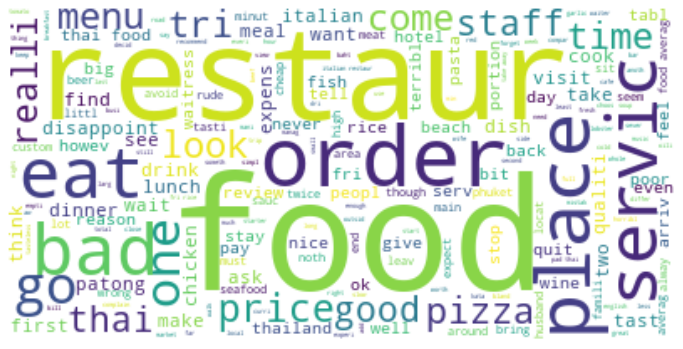

In [74]:
neg_tokens = [word for review in reviews_negative_subset['new_review_total'] for word in review]

wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [75]:
HotelReviewCount['new_review_total'] = HotelReviewCount['Processed_review'].apply(preprocess_text)
reviews_positive_subset = HotelReviewCount.loc[(HotelReviewCount['Hotel/Restaurant name'].isin(Hotel_list))
  & (HotelReviewCount['compound']>=0), :]

reviews_negative_subset = HotelReviewCount.loc[(HotelReviewCount['Hotel/Restaurant name'].isin(Hotel_list))
  & (HotelReviewCount['compound']<=0), :]

reviews_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Processed_review,Location_Hotel,compound,neg,neu,pos,new_review,new_review_total
593,rn579710123,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,wow find true tripadvisor happy chance dine st...,Phuket Town_Surf and Turf by Soul Kitchen,0.9694,0.000,0.368,0.632,"[wow, find, true, tripadvisor, happi, chanc, d...","[wow, find, true, tripadvisor, happi, chanc, d..."
594,rn578870903,Reviewed 1 week ago,Phuket Town,Surf and Turf by Soul Kitchen,good crossover food ever fully satisfied one t...,Phuket Town_Surf and Turf by Soul Kitchen,0.8610,0.000,0.431,0.569,"[good, crossov, food, ever, fulli, satisfi, on...","[good, crossov, food, ever, fulli, satisfi, on..."
595,rn576141183,Reviewed 3 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,visit restaurant base review ta order beef rav...,Phuket Town_Surf and Turf by Soul Kitchen,0.8910,0.000,0.685,0.315,"[visit, restaur, base, review, ta, order, beef...","[visit, restaur, base, review, ta, order, beef..."
596,rn573849598,Reviewed 4 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,husband go dinner last night pleased food serv...,Phuket Town_Surf and Turf by Soul Kitchen,0.8756,0.000,0.560,0.440,"[husband, go, dinner, last, night, pleas, food...","[husband, go, dinner, last, night, pleas, food..."
597,rn572956411,"Reviewed April 12, 2018",Phuket Town,Surf and Turf by Soul Kitchen,french chef really concerned quality dish fish...,Phuket Town_Surf and Turf by Soul Kitchen,0.3400,0.158,0.592,0.250,"[french, chef, realli, concern, qualiti, dish,...","[french, chef, realli, concern, qualiti, dish,..."


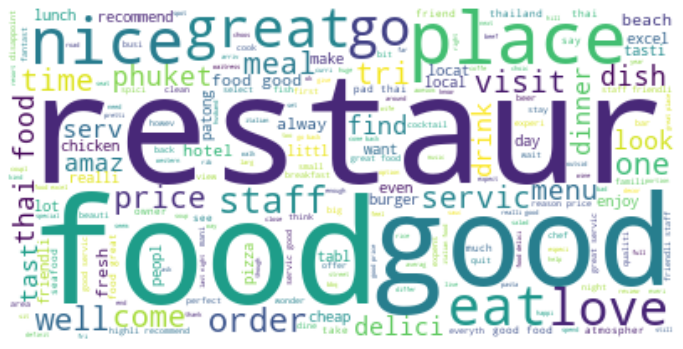

In [76]:
pos_tokens = [word for review in reviews_positive_subset['new_review_total'] for word in review]

wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(pos_tokens))

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [77]:
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   food    good restaur   great   place  servic    thai   staff    nice      go 
   2074    1554    1008     926     839     736     617     589     578     552 


In [78]:
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

   food restaur   order  servic   place     bad    thai     eat      go    time 
    163     105      80      64      63      54      53      53      50      48 


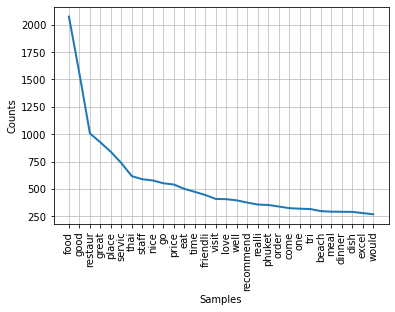

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [79]:
pos_freqdist.plot(30)

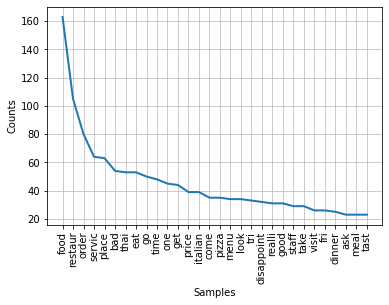

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [80]:
neg_freqdist.plot(30)